<a href="https://colab.research.google.com/github/earo12/Credit-Score-Classification/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Score Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [4]:
df_train = pd.read_csv('train.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
df_copy_train = df_train.copy()
def isnull():
  return df_copy_train.isnull().sum()

In [8]:
isnull()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [9]:
print(f'Shape of train data: {df_train.shape}')

Shape of train data: (100000, 28)


In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


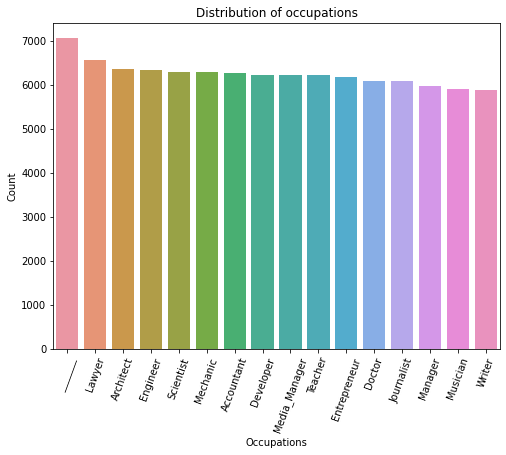

In [11]:
values_oc = df_copy_train['Occupation'].value_counts()
plt.figure(figsize = (8, 6))
sns.barplot(data = df_copy_train, x = values_oc.index, y = values_oc.values)
plt.xlabel('Occupations')
plt.xticks(rotation = 70)
plt.ylabel('Count')
plt.title('Distribution of occupations')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


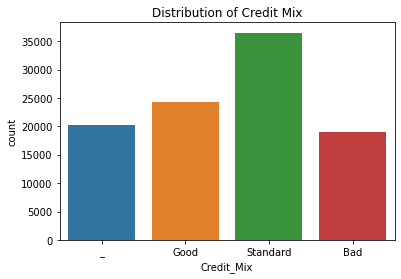

In [12]:
sns.countplot(df_copy_train['Credit_Mix'])
plt.title('Distribution of Credit Mix')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


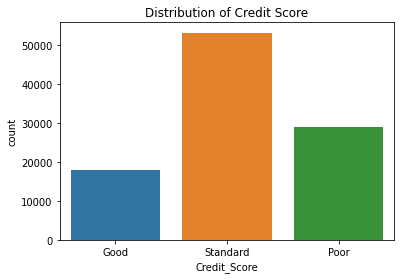

In [13]:
sns.countplot(df_copy_train['Credit_Score'])
plt.title('Distribution of Credit Score')
plt.show()

Since Type of Loan feature had many values on it, I decided to take a look at its values instead of make a graph.

In [14]:
loans = df_copy_train['Type_of_Loan'].value_counts()
loans.head()

Not Specified              1408
Credit-Builder Loan        1280
Personal Loan              1272
Debt Consolidation Loan    1264
Student Loan               1240
Name: Type_of_Loan, dtype: int64

Because we have many features we're not going to use them, we can drop them

In [15]:
df_copy_train.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age'], axis = 1, inplace = True)

In [16]:
print(f'Number of duplicates in train:{df_copy_train.duplicated().sum()}')

Number of duplicates in train:0


In [17]:
df_copy_train['Num_Credit_Card'].replace(0, 1, inplace = True)

In [18]:
df_copy_train['Payment_of_Min_Amount'].replace('NM', 'No', inplace = True) #because we have NM values we must change them to No values

In [19]:
df_copy_train['Payment_Behaviour'].replace('!@9#%8', inplace = True) #At the same ime here we have some strange values like this one

In [20]:
df_copy_train['Occupation'].replace('_______', inplace = True) #since we have values like '_______' as we saw earilier, we must replace them

In [21]:
df_copy_train['Occupation'].value_counts()

Lawyer           7097
Engineer         6849
Architect        6832
Mechanic         6775
Scientist        6746
Accountant       6745
Media_Manager    6732
Developer        6712
Teacher          6685
Entrepreneur     6653
Doctor           6564
Journalist       6534
Manager          6422
Musician         6345
Writer           6309
Name: Occupation, dtype: int64

In [22]:
df_copy_train['Credit_Mix'].replace('_', inplace = True) #like in the previous one we have to replace this part of '_' value   

In [23]:
df_copy_train['Credit_Mix'].value_counts()

Standard    45820
Good        30351
Bad         23828
_               1
Name: Credit_Mix, dtype: int64

In [24]:
#We're still having one '_' value so we can use this function in order to drop it
sol = {'Bad' : 0, 'Good' : 1, 'Standard' :  2, '_' : np.nan}
df_copy_train['Credit_Mix'] = df_copy_train['Credit_Mix'].map(sol)
df_copy_train['Credit_Mix'].value_counts()

2.0    45820
1.0    30351
0.0    23828
Name: Credit_Mix, dtype: int64

Let's check numerical values only

In [25]:
nums = df_copy_train.select_dtypes(exclude = 'object').columns[1:]
nums

Index(['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

In [26]:
df_copy_train['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      27593
High_spent_Medium_value_payments    19010
Low_spent_Medium_value_payments     14987
High_spent_Large_value_payments     14863
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments      11297
Name: Payment_Behaviour, dtype: int64

In [27]:
impute = SimpleImputer(strategy = 'most_frequent')
impute.fit(df_copy_train[['Payment_Behaviour']])
df_copy_train[['Payment_Behaviour']] = impute.transform(df_copy_train[['Payment_Behaviour']])


In [28]:
isnull()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      1
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Fill the null values of monthly inhad salary



In [29]:
fill_list = df_copy_train['Monthly_Inhand_Salary'].dropna().tolist()
df_copy_train['Monthly_Inhand_Salary'] = df_copy_train['Monthly_Inhand_Salary'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_copy_train.index))))

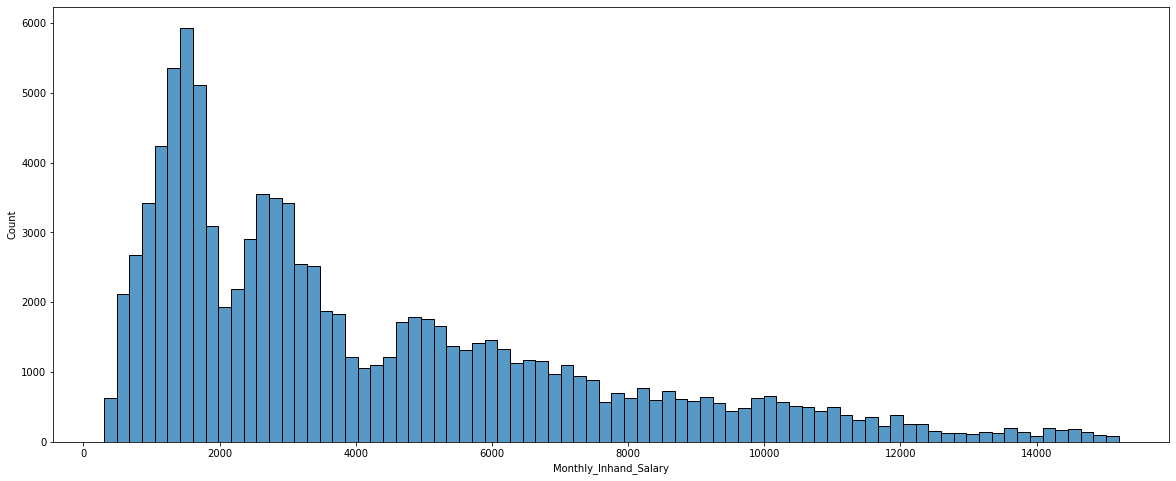

In [30]:
plt.figure(figsize = (20, 8))
sns.histplot(data = df_copy_train, x = df_copy_train['Monthly_Inhand_Salary'])
plt.show()

Fill the null values of delayed payment 

In [31]:
fill_list = df_copy_train['Num_of_Delayed_Payment'].dropna().tolist()
df_copy_train['Num_of_Delayed_Payment'] = df_copy_train['Num_of_Delayed_Payment'].fillna(pd.Series(np.random.choice(fill_list, size = len(df_copy_train.index))))

Fill the null values of num credit inqueries

In [32]:
fill_list = df_copy_train['Num_Credit_Inquiries'].dropna().tolist()
df_copy_train['Num_Credit_Inquiries'] = df_copy_train['Num_Credit_Inquiries'].fillna(pd.Series(np.random.choice(fill_list, size = len(df_copy_train.index))))

Fill the null values of Amount Invested Monthly

In [33]:
fill_list = df_copy_train['Amount_invested_monthly'].dropna().tolist()
df_copy_train['Amount_invested_monthly'] = df_copy_train['Amount_invested_monthly'].fillna(pd.Series(np.random.choice(fill_list, size = len(df_copy_train.index))))

Fill the null values of Montly Balance

In [79]:
fill_list = df_copy_train['Monthly_Balance'].dropna().tolist()
df_copy_train['Monthly_Balance'] = df_copy_train['Monthly_Balance'].fillna(pd.Series(np.random.choice(fill_list, size = len(df_copy_train.index))))

Fill the null value of Credit Mix

In [35]:
fill_list = df_copy_train['Credit_Mix'].dropna().tolist()
df_copy_train['Credit_Mix'] = df_copy_train['Credit_Mix'].fillna(pd.Series(np.random.choice(fill_list, size = len(df_copy_train.index))))

Fill the null values of Changed_Credit_Limit        

In [78]:
fill_list = df_copy_train['Changed_Credit_Limit'].dropna().tolist()
df_copy_train['Changed_Credit_Limit'] = df_copy_train['Changed_Credit_Limit'].fillna(pd.Series(np.random.choice(fill_list, size = len(df_copy_train.index))))

In [37]:
df_copy_train.shape

(100000, 21)

In [38]:
rows = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
pd.set_option('mode.chained_assignment', None)
for i in rows:    #to change object values to numeric
  df_copy_train[i] = df_copy_train[i].str.replace(r'_+', '')
for k in rows:
  df_copy_train[k] = pd.to_numeric(df_copy_train[k], errors = 'coerce')


<ipython-input-38-132108e367b6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy_train[i] = df_copy_train[i].str.replace(r'_+', '')


In [39]:
df_copy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  int64  
 10  Changed_Credit_Limit      97909 non-null   float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  float64
 13  Outstanding_Debt          100000 non-null  fl

In [40]:
isnull()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        2091
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             1668
Credit_Score                   0
dtype: int64

Outliers in Age

In [41]:
((df_copy_train['Age'] <= 100) & (df_copy_train['Age'] >= 0)).value_counts()

True     97224
False     2776
Name: Age, dtype: int64

In [42]:
df = df_copy_train[(df_copy_train['Age'] <= 100) & (df_copy_train['Age'] >= 0)]
#df

Outliers in Annual Income

In [43]:
((df_copy_train['Annual_Income'] <= 300000) & (df_copy_train['Annual_Income'] >= 0)).value_counts()

True     99007
False      993
Name: Annual_Income, dtype: int64

In [44]:
df = df_copy_train[(df_copy_train['Annual_Income'] <= 300000)& (df_copy_train['Annual_Income'] >= 0) ]

Outliers in Monthly Inhad Salary

In [45]:
((df_copy_train['Monthly_Inhand_Salary'] <= 1500) & (df_copy_train['Monthly_Inhand_Salary'] >= 0)).value_counts()

False    78887
True     21113
Name: Monthly_Inhand_Salary, dtype: int64

In [46]:
df = df_copy_train[(df_copy_train['Monthly_Inhand_Salary'] <= 1500)& (df_copy_train['Monthly_Inhand_Salary'] >= 0) ]

Outliers in Number of Bank Accounts

In [47]:
((df_copy_train['Num_Bank_Accounts'] <= 750) & (df_copy_train['Num_Bank_Accounts'] >= 0)).value_counts()

True     99207
False      793
Name: Num_Bank_Accounts, dtype: int64

In [48]:
df = df_copy_train[(df_copy_train['Num_Bank_Accounts'] <= 750)& (df_copy_train['Num_Bank_Accounts'] >= 0) ]

Outliers in Number of Credit Card

In [49]:
((df_copy_train['Num_Credit_Card'] <= 1000) & (df_copy_train['Num_Bank_Accounts'] >= 0)).value_counts()

True     99205
False      795
dtype: int64

In [50]:
df = df_copy_train[(df_copy_train['Num_Credit_Card'] <= 1000)& (df_copy_train['Num_Credit_Card'] >= 0) ]

Outliers in Interest Rate

In [51]:
((df_copy_train['Interest_Rate'] <= 5000) & (df_copy_train['Interest_Rate'] >= 0)).value_counts()

True     99740
False      260
Name: Interest_Rate, dtype: int64

In [52]:
df = df_copy_train[(df_copy_train['Interest_Rate'] <= 5000)& (df_copy_train['Interest_Rate'] >= 0) ]

Outliers Number of Loan

In [53]:
((df_copy_train['Num_of_Loan'] <= 1100) & (df_copy_train['Num_of_Loan'] >= 0)).value_counts()

True     95994
False     4006
Name: Num_of_Loan, dtype: int64

In [54]:
df = df_copy_train[(df_copy_train['Num_of_Loan'] <= 1100) & (df_copy_train['Num_of_Loan'] >= 0) ]

Outliers Delay from due date

In [55]:
((df_copy_train['Delay_from_due_date'] <= 65) & (df_copy_train['Delay_from_due_date'] >= 0)).value_counts()

True     99355
False      645
Name: Delay_from_due_date, dtype: int64

In [56]:
df = df_copy_train[(df_copy_train['Delay_from_due_date'] <= 65) & (df_copy_train['Delay_from_due_date'] >= 0) ]

Outliers Number of Delayed Payment

In [57]:
((df_copy_train['Num_of_Delayed_Payment'] <= 1000) & (df_copy_train['Num_of_Delayed_Payment'] >= 0)).value_counts()

True     98681
False     1319
Name: Num_of_Delayed_Payment, dtype: int64

In [58]:
df = df_copy_train[(df_copy_train['Num_of_Delayed_Payment'] <= 1000) & (df_copy_train['Num_of_Delayed_Payment'] >= 0) ]

Outliers Changed Credit Limit

In [59]:
((df_copy_train['Changed_Credit_Limit'] <= 30) & (df_copy_train['Changed_Credit_Limit'] >= 0)).value_counts()

True     96068
False     3932
Name: Changed_Credit_Limit, dtype: int64

In [60]:
df = df_copy_train[(df_copy_train['Changed_Credit_Limit'] <= 30) & (df_copy_train['Changed_Credit_Limit'] >= 0) ]

Outliers Number of Credit Inqueries

In [61]:
((df_copy_train['Num_Credit_Inquiries'] <= 2400) & (df_copy_train['Num_Credit_Inquiries'] >= 0)).value_counts()

True     99889
False      111
Name: Num_Credit_Inquiries, dtype: int64

In [62]:
df = df_copy_train[(df_copy_train['Num_Credit_Inquiries'] <= 2400) & (df_copy_train['Num_Credit_Inquiries'] >= 0) ]

Outliers Outstanding Debt

In [63]:
((df_copy_train['Outstanding_Debt'] <= 4950) & (df_copy_train['Outstanding_Debt'] >= 0)).value_counts()

True     99680
False      320
Name: Outstanding_Debt, dtype: int64

In [64]:
df = df_copy_train[(df_copy_train['Outstanding_Debt'] <= 4950) & (df_copy_train['Outstanding_Debt'] >= 0) ]

Outliers Credit Utilization Ratio

In [65]:
((df_copy_train['Credit_Utilization_Ratio'] <= 45) & (df_copy_train['Credit_Utilization_Ratio'] >= 0)).value_counts()

True     99836
False      164
Name: Credit_Utilization_Ratio, dtype: int64

In [66]:
df = df_copy_train[(df_copy_train['Credit_Utilization_Ratio'] <= 45) & (df_copy_train['Credit_Utilization_Ratio'] >= 0) ]

Outliers Total EMI

In [67]:
((df_copy_train['Total_EMI_per_month'] <= 75000) & (df_copy_train['Total_EMI_per_month'] >= 0)).value_counts()

True     99725
False      275
Name: Total_EMI_per_month, dtype: int64

In [68]:
df = df_copy_train[(df_copy_train['Total_EMI_per_month'] <= 75000) & (df_copy_train['Total_EMI_per_month'] >= 0) ]

Outliers Amount_invested_monthly 

In [69]:
((df_copy_train['Amount_invested_monthly'] <= 9000) & (df_copy_train['Amount_invested_monthly'] >= 0)).value_counts()

True     95520
False     4480
Name: Amount_invested_monthly, dtype: int64

In [70]:
df = df_copy_train[(df_copy_train['Amount_invested_monthly'] <= 9000) & (df_copy_train['Amount_invested_monthly'] >= 0) ]

Outliers Monthly_Balance

In [71]:
((df_copy_train['Monthly_Balance'] > -1) ).value_counts()

True     98323
False     1677
Name: Monthly_Balance, dtype: int64

In [72]:
df = df_copy_train[(df_copy_train['Monthly_Balance'] > -1)]

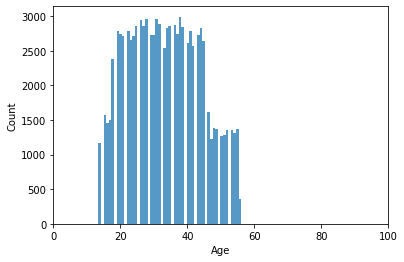

In [73]:
sns.histplot(df_copy_train['Age'])
plt.xlim([0,100])
plt.show()

In [80]:
isnull()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

<Figure size 1296x432 with 0 Axes>

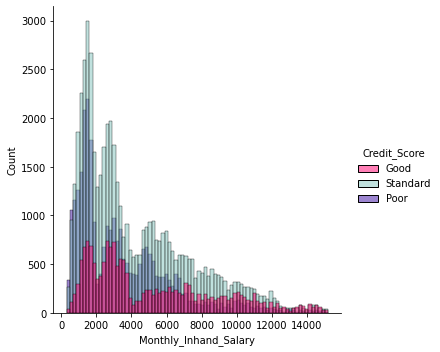

<Figure size 1296x432 with 0 Axes>

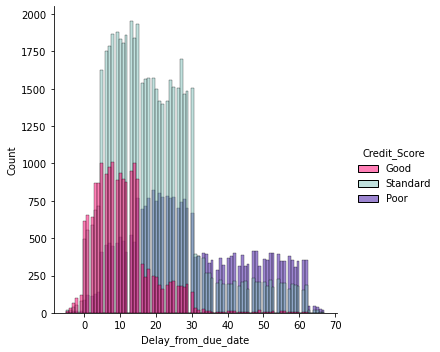

<Figure size 1296x432 with 0 Axes>

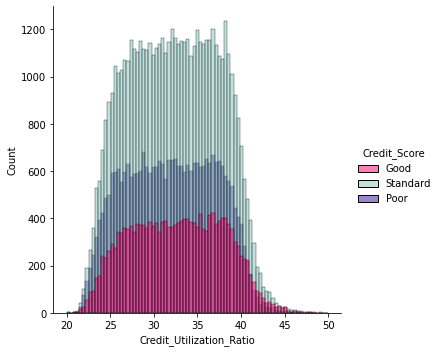

In [75]:
numCols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Credit_Utilization_Ratio']
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=df_copy_train, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"])
    plt.show()

Now we have all the data cleaned so we have to change everything to arrays in order to work with Scikit-Learn

In [76]:
df_copy_train.select_dtypes(['object']).columns

Index(['Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [98]:
Occupation_Encoder, Payment_of_Min_Amount_Encoder, Payment_Behaviour_Encoder, Credit_Score_Encoder = LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()



In [99]:
df_copy_train['Occupation'] = Occupation_Encoder.fit_transform(df_copy_train['Occupation'])
df_copy_train['Payment_of_Min_Amount'] = Payment_of_Min_Amount_Encoder.fit_transform(df_copy_train['Payment_of_Min_Amount'])
df_copy_train['Payment_Behaviour'] = Payment_Behaviour_Encoder.fit_transform(df_copy_train['Payment_Behaviour'])
df_copy_train['Credit_Score'] = Credit_Score_Encoder.fit_transform(df_copy_train['Payment_Behaviour'])

So far we have almost everything, now we can check correlation with every feature with the heat map plot as usual.

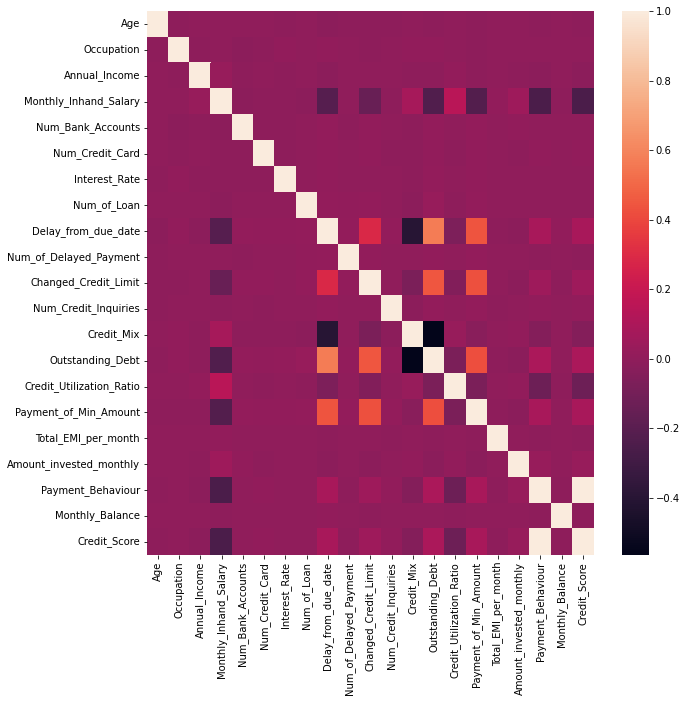

In [104]:
plt.figure(figsize =(10,10))
sns.heatmap(df_copy_train.corr(), annot = False)
plt.show()